# Get Box office data from moviemojo

In [3]:
# Imports
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

## _Get the box office number for the desired week_

In [4]:
def get_site(week, year):
    """
    Get the page source for BOM top daily gross corresponding to month and year 
    """
    html = 'http://www.boxofficemojo.com/weekend/chart/?yr={}&wknd={}&p=.htm'.format(year, week)
    r = requests.get(html)  # Most sites can be accessed via the get function
    return r.content

## _Parse the source code and clean data_

In [22]:
def parse_source(page_source):
    
    page_soup = bs(page_source, "lxml")
    table = page_soup.find_all('table', attrs={'cellspacing': '1'})[0]  
    
    output_columns = ['TW', 'LW', 'Title', 'Studio', 'Weekend_Gross/$', '%_Change',
                  'Theater_Count','Theater_Change', 'Average/$', 'Total_Gross/$', 'Budget', 'num_week']
    output = dict((x, []) for x in output_columns)

    all_rows = table.find_all('tr')[1:106]

    for row in all_rows[:50]:
        row_cols = row.find_all('td')
        for dict_key, col in zip(output_columns, row_cols):
            output[dict_key].append(col.text)

    output_pd = pd.DataFrame(output)
    output_pd = output_pd[output_columns]
    
    return output_pd

def df_format(main_df):
    change_columns1 = ['Weekend_Gross/$', 'Average/$', 'Total_Gross/$', '%_Change']
    change_columns2 = ['Theater_Change', 'Theater_Count']
    change_columns3 = ['num_week', 'TW']
    main_df.drop('Budget', axis=1, inplace=True)
    for i in change_columns1:
        if i != '%_Change':
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].str.replace(',', '')
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].str.replace('$', '') 
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].astype(int) 
        else:
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].str.replace('%', '')
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].str.replace(',', '')
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].replace('-', 0)
            main_df.loc[:, str(i)] = main_df.loc[:, str(i)].astype(float) 

    for b in change_columns2:
        if b == 'Theater_Count':
            main_df.loc[:, str(b)] = main_df.loc[:, str(b)].str.replace(',', '')
            main_df.loc[:, str(b)] = main_df.loc[:, str(b)].astype(int)
        elif b == 'Theater_Change':
            main_df.loc[:, str(b)] = main_df.loc[:, str(b)].str.replace(',', '')
            main_df.loc[:, str(b)] = main_df.loc[:, str(b)].replace('-', 0)
            main_df.loc[:, str(b)] = main_df.loc[:, str(b)].astype(int) 

    for c in change_columns3:
        main_df.loc[:, str(c)] = main_df.loc[:, str(c)].astype(int) 
    main_df.set_index('TW', inplace=True)
    return main_df


def get_sum(df):
    print('total gross box office: ',df['Weekend_Gross/$'].sum(),'$')
    count = df['Theater_Count'].sort_values(ascending=False).head(10)
    print(count)

In [6]:
import datetime
datetime.date(2018, 9, 12).isocalendar()[1]

37

### _Get the table_

In [6]:
new = get_site(36, 2018)
main_df = parse_source(new)
main_df =df_format(main_df)
main_df

,LW,Title,Studio,Weekend_Gross/$,%_Change,Theater_Count,Theater_Change,Average/$,Total_Gross/$,num_week
TW,,,,,,,,,,
1,N,The Nun,WB (NL),53807379,0.0,3876,0,13882,53807379,1
2,N,Peppermint,STX,13423255,0.0,2980,0,4504,13423255,1
3,1,Crazy Rich Asians,WB,13148404,-40.1,3865,0,3402,135770569,4
4,2,The Meg,WB,6094327,-42.2,3511,-250,1736,131637101,5
5,4,Searching,SGem,4570235,-24.7,2009,802,2275,14366365,3
6,3,Mission: Impossible - Fallout,Par.,3885798,-44.7,2334,-305,1665,212202565,7
7,6,Disney's Christopher Robin,BV,3404931,-35.5,2518,-407,1352,91934021,6
8,5,Operation Finale,MGM,2871184,-52.3,1818,0,1579,13935630,2
9,9,BlacKkKlansman,Focus,2609915,-37.9,1547,-219,1687,43498445,5


### _Further investigation_

In [17]:
# a closer investigation to see which studio is doing well
# week 36
week36 = pd.DataFrame(main_df.groupby('Studio')['Weekend_Gross/$'].sum()).sort_values('Weekend_Gross/$', ascending=False)
week36.head()

,Weekend_Gross/$
Studio,
WB (NL),53821189
WB,19528313
STX,15712135
BV,5420586
SGem,5408761


- It seems like Warner Bros is doing prettey well in week 36

In [18]:
# Let's have a look week 35 and 34 
# To make this easier, let's create a function
def get_top_box_office(week, year):
    new = get_site(week, year)
    main_df = df_format(parse_source(new))
    return pd.DataFrame(main_df.groupby('Studio')['Weekend_Gross/$'].sum())\
                                .sort_values('Weekend_Gross/$', ascending=False)

In [19]:
week35 = get_top_box_office(35, 2018)
week34 = get_top_box_office(34, 2018)

In [21]:
week35.head()

,Weekend_Gross/$
Studio,
WB,32946009
BV,10171125
STX,8148650
SGem,7882877
Par.,7032499


In [22]:
week34.head()

,Weekend_Gross/$
Studio,
WB,38190887
STX,15898467
BV,9823287
Par.,8087385
Studio 8,6002359


- It seems like Warner Bros was doing pretty well in week34 and week35, too.

## Let's get all the top 10 box office from 2018 and combine them

In [10]:
# Modify the function and make it return the top 10 of studio name and weekend_gross

def get_top_box_office2(week, year):
    new = get_site(week, year)
    main_df = df_format(parse_source(new))
    main_df2 = pd.DataFrame(main_df.groupby('Studio')['Weekend_Gross/$'].sum())\
                                .sort_values('Weekend_Gross/$', ascending=False).reset_index()
    return main_df2['Studio'].tolist()[:10], main_df2['Weekend_Gross/$'].tolist()[:10]

In [25]:
%%time
data = []
for i in range(1, 36):
    studio, gross = get_top_box_office2(i, 2018)
    data.append((i, studio, gross))

CPU times: user 25.6 s, sys: 198 ms, total: 25.7 s
Wall time: 47.6 s


In [67]:
# Find all the top 10 studio in to a 1 list.
top_10 = []
for i in data:
    top_10.extend(i[1])

In [69]:
top_10_count = pd.DataFrame(pd.Series(top_10).value_counts()).reset_index()

In [70]:
top_10_count.columns = ['Studio', 'Counts']

In [74]:
top_10_count = top_10_count[:10]

In [75]:
top_10_count

,Studio,Counts
0,BV,35
1,Uni.,30
2,WB,30
3,Fox,28
4,Par.,25
5,Sony,24
6,Focus,21
7,WB (NL),19
8,STX,19
9,FoxS,15


- It seems like BV (Disney) is the winner of 2018 box office so far, followed by Universal, Warner Brother, Fox, Paramount

In [47]:
# Let's caluculate the box office for each studio.
# What we need to do is to pair studio name and box office in one tuple
box_office = []
for a in data:
    for b, c in zip(a[1], a[2]):
        box_office.append((b, c))

In [49]:
box_office_df = pd.DataFrame(box_office, columns=['studio', 'box_office'])

In [58]:
# Get the sum of box office
box_office_sum = box_office_df.groupby('studio', as_index=False)['box_office'].sum().sort_values(by='box_office', ascending = False)

In [80]:
# Do some preprocessing, so we can join two table
box_office_sum_10 = box_office_sum[:10].reset_index()
box_office_sum_10['index'] = [i for i in range(len(box_office_sum_10))]

In [81]:
# Do some preprocessing, so we can join two table
top_10_count['index'] = [i for i in range(len(top_10_count))]

/Users/kunsitu/anaconda2/envs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
# join two dfs
top_10 = box_office_sum_10.set_index('index').join(top_10_count.set_index('index'))

In [85]:
# Now we can compare the top 10 box office number with top 10 studios are in top 10 box office every week
top_10

,studio,box_office,Studio,Counts
index,,,,
0,BV,1905860940,BV,35
1,Uni.,726679605,Uni.,30
2,Fox,514593359,WB,30
3,WB,499153758,Fox,28
4,Sony,446228369,Par.,25
5,Par.,377275415,Sony,24
6,WB (NL),193747930,Focus,21
7,STX,141552863,WB (NL),19
8,LGF,110786988,STX,19


## visualisation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1192a0e10>],
      dtype=object)

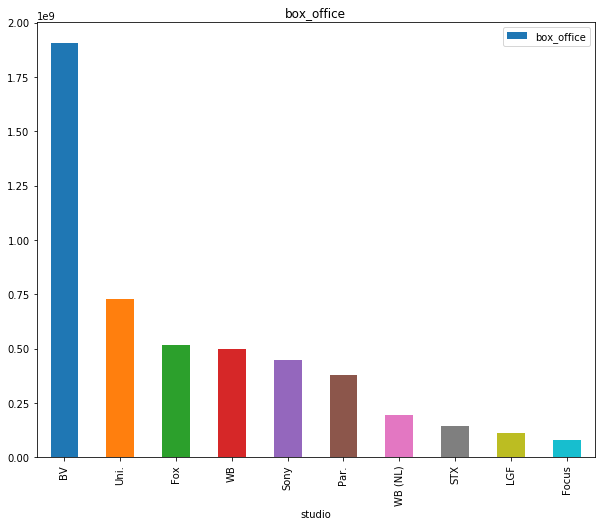

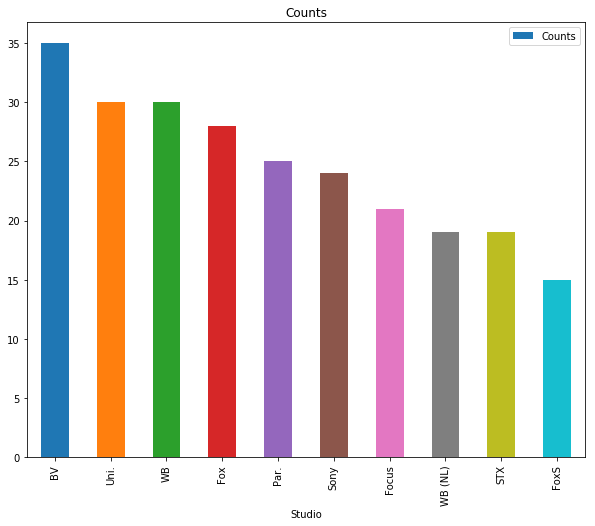

In [93]:
top_10.plot(kind='bar', x='studio', y='box_office', figsize = (10, 8), subplots=True, sharex=True)
top_10.plot(kind='bar', x='Studio', y='Counts', figsize = (10, 8), subplots=True,  sharex=True)

- Two charts showed that once again BV (Disney donmintates the box office in 2018)
- BV's box office sale is more than twice as Universal, although it only got into top 10 weekend box offices 5 more times than Universal.
</br>
### This can be further explored in the next part